In [1]:
from project_functions import load_and_process # This is called a relative import
df=load_and_process('/Users/feisong/Desktop/DATA_301/project-group24-project/data/raw/Raw Data.csv')
df

,age,sex,bmi,children,smoker,region,Insurance Premium
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Insurance Premium,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [3]:
from pandas_profiling import ProfileReport
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations:
1. Distribution of variables:
    a) "age": relatively the same except for the groups of age 18 and age 19, which are much higher compared to other age groups 
    b) "sex": relatively the same between males and females
    c) "bmi": relatively normal distribution with a mean of 30.4
    d) "children": positively skewed 
    e) "smoker": much more non-smoker than smokers 
    f) "region": relatively the same among four regions
    g) "Insurance Premium": positively skewed 
2. Correlations:  
a) The variables that are most correlated with the Insurance Premium are "smoker", "age", and "bmi".
b) Other relationships found: "age" & "children"; "region" & "bmi"; "age" & "bmi"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(y='sex',data=df)
plt.title('Distribution by Sex')
ax.set(xlabel='Count of numbers',ylabel='Sex')

[Text(0.5, 0, 'Count of numbers'), Text(0, 0.5, 'Smoking status')]

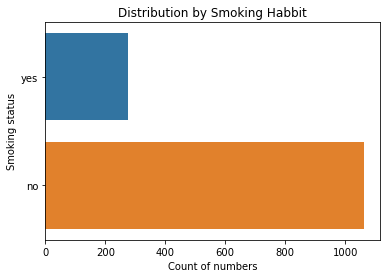

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(y='smoker',data=df)
plt.title('Distribution by Smoking Habbit')
ax.set(xlabel='Count of numbers',ylabel='Smoking status')

[Text(0.5, 0, 'Count of numbers'), Text(0, 0.5, 'Region')]

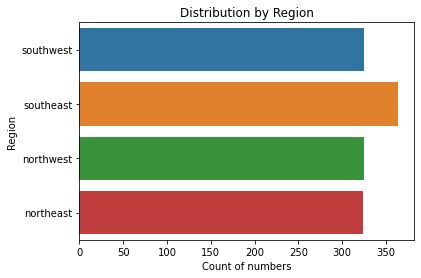

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(y='region',data=df)
plt.title('Distribution by Region')
ax.set(xlabel='Count of numbers',ylabel='Region')

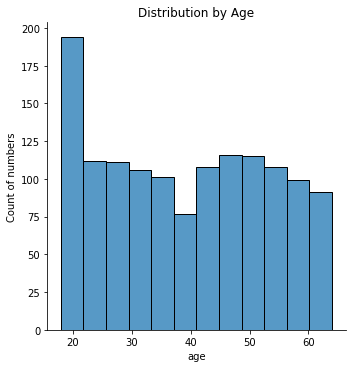

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.displot(df['age'],kde=False)
plt.title('Distribution by Age')
ax.set(ylabel='Count of numbers')


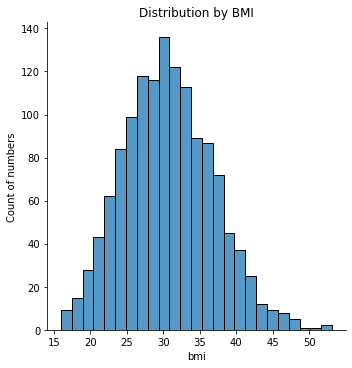

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.displot(df['bmi'],kde=False)
plt.title('Distribution by BMI')
ax.set(ylabel='Count of numbers')

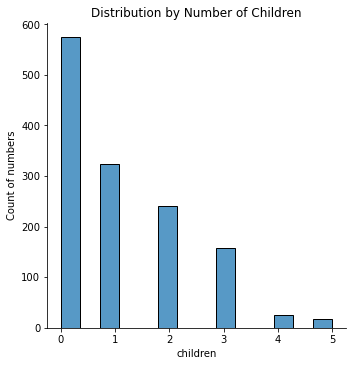

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.displot(df['children'],kde=False)
plt.title('Distribution by Number of Children')
ax.set(ylabel='Count of numbers')

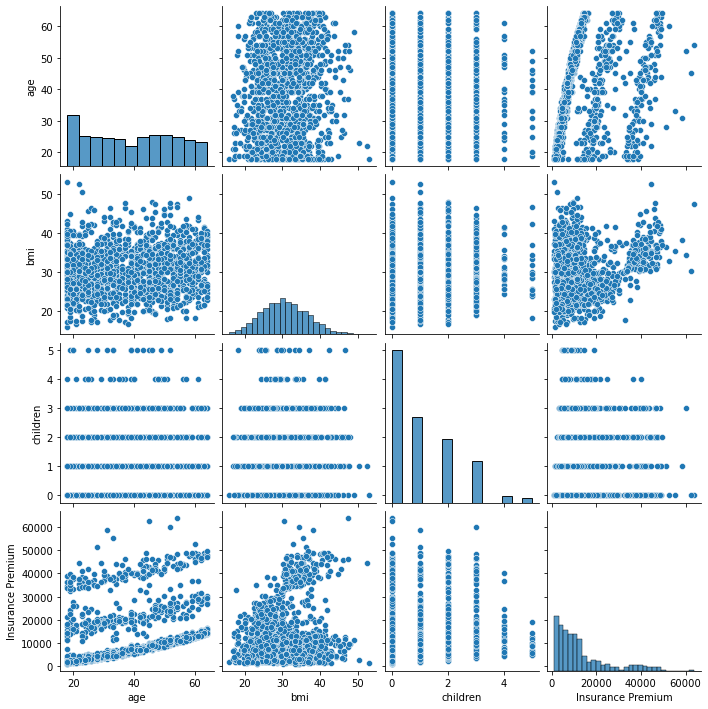

In [11]:
sns.pairplot(df)

sns.regplot(x='age',y='Insurance Premium',data=df)

<AxesSubplot:xlabel='bmi', ylabel='Insurance Premium'>

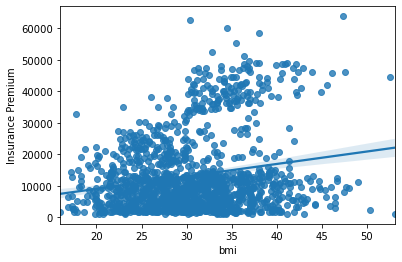

In [19]:
sns.regplot(x='bmi',y='Insurance Premium',data=df)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float64')) -> None

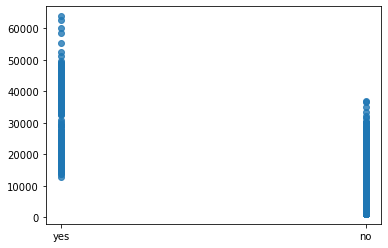

In [17]:
sns.regplot(x='smoker',y='Insurance Premium',data=df)

<AxesSubplot:xlabel='age', ylabel='children'>

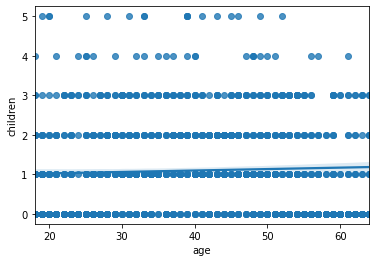

In [22]:
sns.regplot(x='age',y='children',data=df)

<AxesSubplot:xlabel='age', ylabel='bmi'>

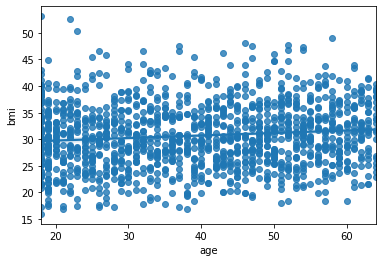

In [23]:
sns.regplot(x='age',y='bmi',data=df)

TypeError: can't multiply sequence by non-int of type 'float'

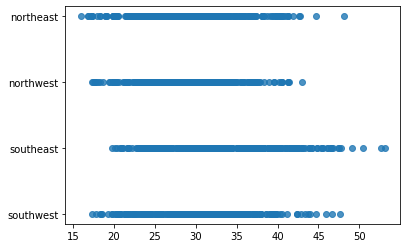

In [24]:
sns.regplot(x='bmi',y='region',data=df)